Linear Regression Supervised Learning Task

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.feature_selection import SelectKBest,f_regression

In [3]:
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [4]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [5]:
df=pd.read_excel(r"/home/intellect/Documents/Data_Scientist/Datasets/Task_students_performance_dataset.xlsx")
df.head(11)

,Student_ID,Gender,Study_Hours_per_Week,Attendance_Percentage,Previous_Sem_Score,Parental_Education,Internet_Access,Family_Income,Tutoring_Classes,Sports_Activity,Extra_Curricular,School_Type,Sleep_Hours,Travel_Time,Test_Anxiety_Level,Peer_Influence,Teacher_Feedback,Motivation_Level,Library_Usage_per_Week,Final_Score
0,S1000,Male,36.330635,86.628815,38.182863,Postgraduate,No,32727.500387,No,Yes,No,Private,6.777112,2.488956,4.526416,1.698767,Good,9.416549,4,44.293533
1,S1001,Female,9.582476,73.504255,95.788249,High School,No,42332.567312,No,Yes,No,Private,6.631231,2.192993,5.920305,8.459841,Excellent,4.382245,4,42.749974
2,S1002,Male,5.795795,65.453321,73.939564,High School,Yes,44142.273093,No,No,Yes,Private,5.311059,0.887486,5.788195,4.140011,Excellent,7.373097,5,29.846049
3,S1003,Male,19.578110,94.381263,53.443393,Graduate,Yes,64498.434188,No,No,Yes,Private,6.380781,1.267095,6.313880,5.694395,Good,5.281190,6,44.030395
4,S1004,Male,39.426018,46.671849,39.749045,Postgraduate,No,42105.884774,No,No,Yes,Private,4.266327,0.397970,1.551979,8.150371,Poor,7.069597,6,42.548877
5,S1005,Female,9.682211,69.557506,85.581763,Postgraduate,No,58016.073277,Yes,Yes,No,Public,5.666932,0.648215,4.259586,8.959389,Good,7.866040,0,45.834753
6,S1006,Male,26.885422,40.681219,73.405093,Postgraduate,Yes,80361.129686,Yes,Yes,No,Private,8.900093,2.370748,7.508154,4.103033,Good,1.409073,1,40.899921
7,S1007,Male,30.464785,68.119639,67.342276,Graduate,Yes,73484.703470,No,Yes,No,Private,5.707374,2.173612,2.805042,5.156591,Excellent,6.819404,8,43.066166
8,S1008,Male,9.505502,43.378197,92.572481,High School,No,50173.178186,No,No,No,Private,8.909240,1.821109,2.832205,4.730645,Poor,3.040671,9,34.788766
9,S1009,Female,29.128654,47.129075,85.201805,Graduate,No,87779.455991,No,Yes,No,Private,7.189597,2.697608,1.090815,1.119259,Average,7.030293,1,50.811575


In [6]:
df.shape

(300, 20)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Student_ID              300 non-null    object 
 1   Gender                  300 non-null    object 
 2   Study_Hours_per_Week    300 non-null    float64
 3   Attendance_Percentage   300 non-null    float64
 4   Previous_Sem_Score      300 non-null    float64
 5   Parental_Education      300 non-null    object 
 6   Internet_Access         300 non-null    object 
 7   Family_Income           300 non-null    float64
 8   Tutoring_Classes        300 non-null    object 
 9   Sports_Activity         300 non-null    object 
 10  Extra_Curricular        300 non-null    object 
 11  School_Type             300 non-null    object 
 12  Sleep_Hours             300 non-null    float64
 13  Travel_Time             300 non-null    float64
 14  Test_Anxiety_Level      300 non-null    fl

In [8]:
print("\n Dataset Overview")
df.head()


 Dataset Overview


,Student_ID,Gender,Study_Hours_per_Week,Attendance_Percentage,Previous_Sem_Score,Parental_Education,Internet_Access,Family_Income,Tutoring_Classes,Sports_Activity,Extra_Curricular,School_Type,Sleep_Hours,Travel_Time,Test_Anxiety_Level,Peer_Influence,Teacher_Feedback,Motivation_Level,Library_Usage_per_Week,Final_Score
0,S1000,Male,36.330635,86.628815,38.182863,Postgraduate,No,32727.500387,No,Yes,No,Private,6.777112,2.488956,4.526416,1.698767,Good,9.416549,4,44.293533
1,S1001,Female,9.582476,73.504255,95.788249,High School,No,42332.567312,No,Yes,No,Private,6.631231,2.192993,5.920305,8.459841,Excellent,4.382245,4,42.749974
2,S1002,Male,5.795795,65.453321,73.939564,High School,Yes,44142.273093,No,No,Yes,Private,5.311059,0.887486,5.788195,4.140011,Excellent,7.373097,5,29.846049
3,S1003,Male,19.578110,94.381263,53.443393,Graduate,Yes,64498.434188,No,No,Yes,Private,6.380781,1.267095,6.313880,5.694395,Good,5.281190,6,44.030395
4,S1004,Male,39.426018,46.671849,39.749045,Postgraduate,No,42105.884774,No,No,Yes,Private,4.266327,0.397970,1.551979,8.150371,Poor,7.069597,6,42.548877


In [9]:
print(f"Missing values:{df.isnull().sum()}")

Missing values:Student_ID                0
Gender                    0
Study_Hours_per_Week      0
Attendance_Percentage     0
Previous_Sem_Score        0
Parental_Education        0
Internet_Access           0
Family_Income             0
Tutoring_Classes          0
Sports_Activity           0
Extra_Curricular          0
School_Type               0
Sleep_Hours               0
Travel_Time               0
Test_Anxiety_Level        0
Peer_Influence            0
Teacher_Feedback          0
Motivation_Level          0
Library_Usage_per_Week    0
Final_Score               0
dtype: int64


In [10]:
le=LabelEncoder()
df['Internet_Access_en']=le.fit_transform(df['Internet_Access'])
df['Tutoring_Classes_en']=le.fit_transform(df['Tutoring_Classes'])
df['Teacher_feedback_en']=le.fit_transform(df['Teacher_Feedback'])


In [11]:
df.head()

,Student_ID,Gender,Study_Hours_per_Week,Attendance_Percentage,Previous_Sem_Score,Parental_Education,Internet_Access,Family_Income,Tutoring_Classes,Sports_Activity,...,Travel_Time,Test_Anxiety_Level,Peer_Influence,Teacher_Feedback,Motivation_Level,Library_Usage_per_Week,Final_Score,Internet_Access_en,Tutoring_Classes_en,Teacher_feedback_en
0,S1000,Male,36.330635,86.628815,38.182863,Postgraduate,No,32727.500387,No,Yes,...,2.488956,4.526416,1.698767,Good,9.416549,4,44.293533,0,0,2
1,S1001,Female,9.582476,73.504255,95.788249,High School,No,42332.567312,No,Yes,...,2.192993,5.920305,8.459841,Excellent,4.382245,4,42.749974,0,0,1
2,S1002,Male,5.795795,65.453321,73.939564,High School,Yes,44142.273093,No,No,...,0.887486,5.788195,4.140011,Excellent,7.373097,5,29.846049,1,0,1
3,S1003,Male,19.578110,94.381263,53.443393,Graduate,Yes,64498.434188,No,No,...,1.267095,6.313880,5.694395,Good,5.281190,6,44.030395,1,0,2
4,S1004,Male,39.426018,46.671849,39.749045,Postgraduate,No,42105.884774,No,No,...,0.397970,1.551979,8.150371,Poor,7.069597,6,42.548877,0,0,3


In [12]:
print("\n Top 10 Features correlated with Total scores:")
corr=df.corr(numeric_only=True)['Final_Score'].sort_values(ascending=False)
print(corr.head(11)[1:])


 Top 10 Features correlated with Total scores:
Previous_Sem_Score       0.632940
Study_Hours_per_Week     0.464599
Attendance_Percentage    0.335473
Family_Income            0.090093
Teacher_feedback_en      0.079710
Sleep_Hours              0.021040
Internet_Access_en      -0.013847
Motivation_Level        -0.020367
Peer_Influence          -0.024590
Tutoring_Classes_en     -0.035658
Name: Final_Score, dtype: float64


In [50]:
top_features=corr.index[1:11]
print(top_features)

Index(['Previous_Sem_Score', 'Study_Hours_per_Week', 'Attendance_Percentage',
       'Family_Income', 'Teacher_feedback_en', 'Sleep_Hours',
       'Internet_Access_en', 'Motivation_Level', 'Peer_Influence',
       'Tutoring_Classes_en'],
      dtype='object')


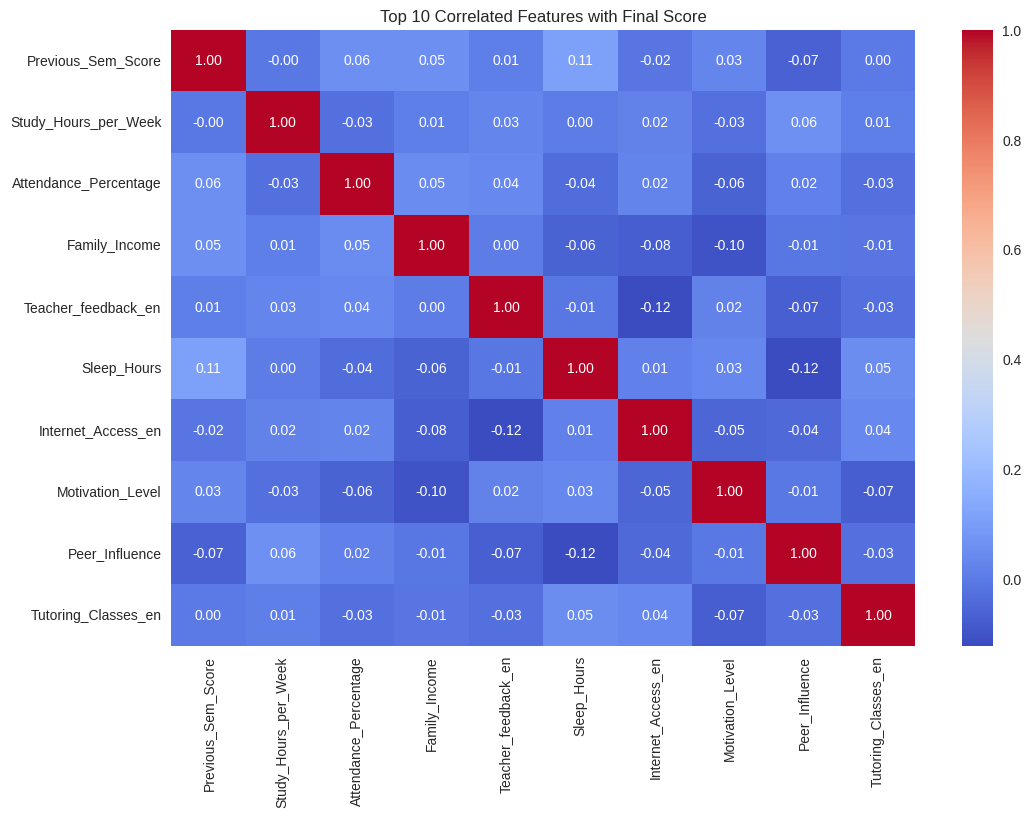

In [51]:
plt.figure(figsize=(12,8))
sns.heatmap(df[top_features].corr(), annot=True ,cmap="coolwarm", fmt=".2f")
plt.title("Top 10 Correlated Features with Final Score")
plt.show()

In [52]:
x=df[top_features]
y=df['Final_Score']

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print("Data Split")
print(f"Training set:{x_train.shape[0]} samples")
print(f"Test set:{x_test.shape[0]} samples")


Data Split
Training set:240 samples
Test set:60 samples


In [54]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [55]:
x_train_scaled

array([[-1.29421336,  0.42177358, -1.06736812, ..., -0.82508692,
         0.38299758,  1.03390789],
       [-1.27112942, -1.16784504,  0.8329788 , ..., -0.55438455,
         0.85407138,  1.03390789],
       [ 0.49093445,  0.56844057, -1.61378556, ..., -1.58338254,
        -0.71030394,  1.03390789],
       ...,
       [-1.53774459,  1.4649556 , -1.19365911, ...,  0.80893518,
         0.7216039 , -0.96720415],
       [ 0.75984116,  0.97402804,  1.56122378, ..., -0.20195464,
        -1.76872781, -0.96720415],
       [-0.93505459,  1.17626448,  0.2376555 , ..., -0.71065798,
         1.5160878 ,  1.03390789]], shape=(240, 10))

In [56]:
print("\nFeatures scaled using StandardScaler")

selector=SelectKBest(score_func=f_regression,k=5)
x_train_selected =selector.fit_transform(x_train_scaled,y_train)
x_test_selected=selector.transform(x_test_scaled)

selected_features=x.columns[selector.get_support()]
print(f"\n Feature selection: Top {len(selected_features)} features selected")
print("\nSelected Features:",list[selected_features])


Features scaled using StandardScaler

 Feature selection: Top 5 features selected

Selected Features: list[Index(['Previous_Sem_Score', 'Study_Hours_per_Week', 'Attendance_Percentage',
       'Teacher_feedback_en', 'Peer_Influence'],
      dtype='object')]


In [57]:
print("\nTraining Linear Regression Model")
model= LinearRegression()
model.fit(x_train_selected,y_train)
print("Model Trained Successfully ")


Training Linear Regression Model
Model Trained Successfully 


In [58]:
y_pred_train=model.predict(x_train_selected)
y_pred_test=model.predict(x_test_selected)

In [59]:
def calculate_metrics(y_true,y_pred,dataset_name):
    mse=mean_squared_error(y_true, y_pred)
    rmse=np.sqrt(mse)
    mae=mean_absolute_error(y_true,y_pred)
    r2=r2_score(y_true,y_pred)
    
    print(f"\n📊 {dataset_name} Set Performance:")
    print(f"R² Score: {r2:.4f}")
    print(f"RMSE: ${rmse:.2f}")
    print(f"MAE: ${mae:.2f}")
    
    return {'R2': r2, 'RMSE': rmse, 'MAE': mae}

In [60]:
train_metrics=calculate_metrics(y_train,y_pred_train,"Training")
test_metrics=calculate_metrics(y_test,y_pred_test,"Test")


📊 Training Set Performance:
R² Score: 0.7361
RMSE: $5.12
MAE: $4.15

📊 Test Set Performance:
R² Score: 0.6233
RMSE: $5.95
MAE: $4.80


In [61]:
print("Overfitting Check")
print(f"R2 Differrence (Train-Test): {train_metrics['R2']-test_metrics['R2']:.4f}")
if abs(train_metrics['R2']-test_metrics['R2']<0.05):
    print("Model is general")
else:
    print("Potential Overfitting Detected")

Overfitting Check
R2 Differrence (Train-Test): 0.1127
Potential Overfitting Detected


In [62]:
feature_importance=pd.DataFrame({
    'Feature':selected_features,
    'Coefficient': model.coef_,
    'Abs_coefficient':np.abs(model.coef_)
}).sort_values("Abs_coefficient",ascending=False)

print("\nFeature Importance Top 5:")
print(feature_importance.head(5))


Feature Importance Top 5:
                 Feature  Coefficient  Abs_coefficient
0     Previous_Sem_Score     6.049457         6.049457
1   Study_Hours_per_Week     4.747277         4.747277
2  Attendance_Percentage     3.144402         3.144402
3    Teacher_feedback_en     0.549949         0.549949
4         Peer_Influence    -0.346289         0.346289


In [63]:
print("Model Interpretation:")
print(f"Intercept: ${model.intercept_:.2f}")

Model Interpretation:
Intercept: $40.92


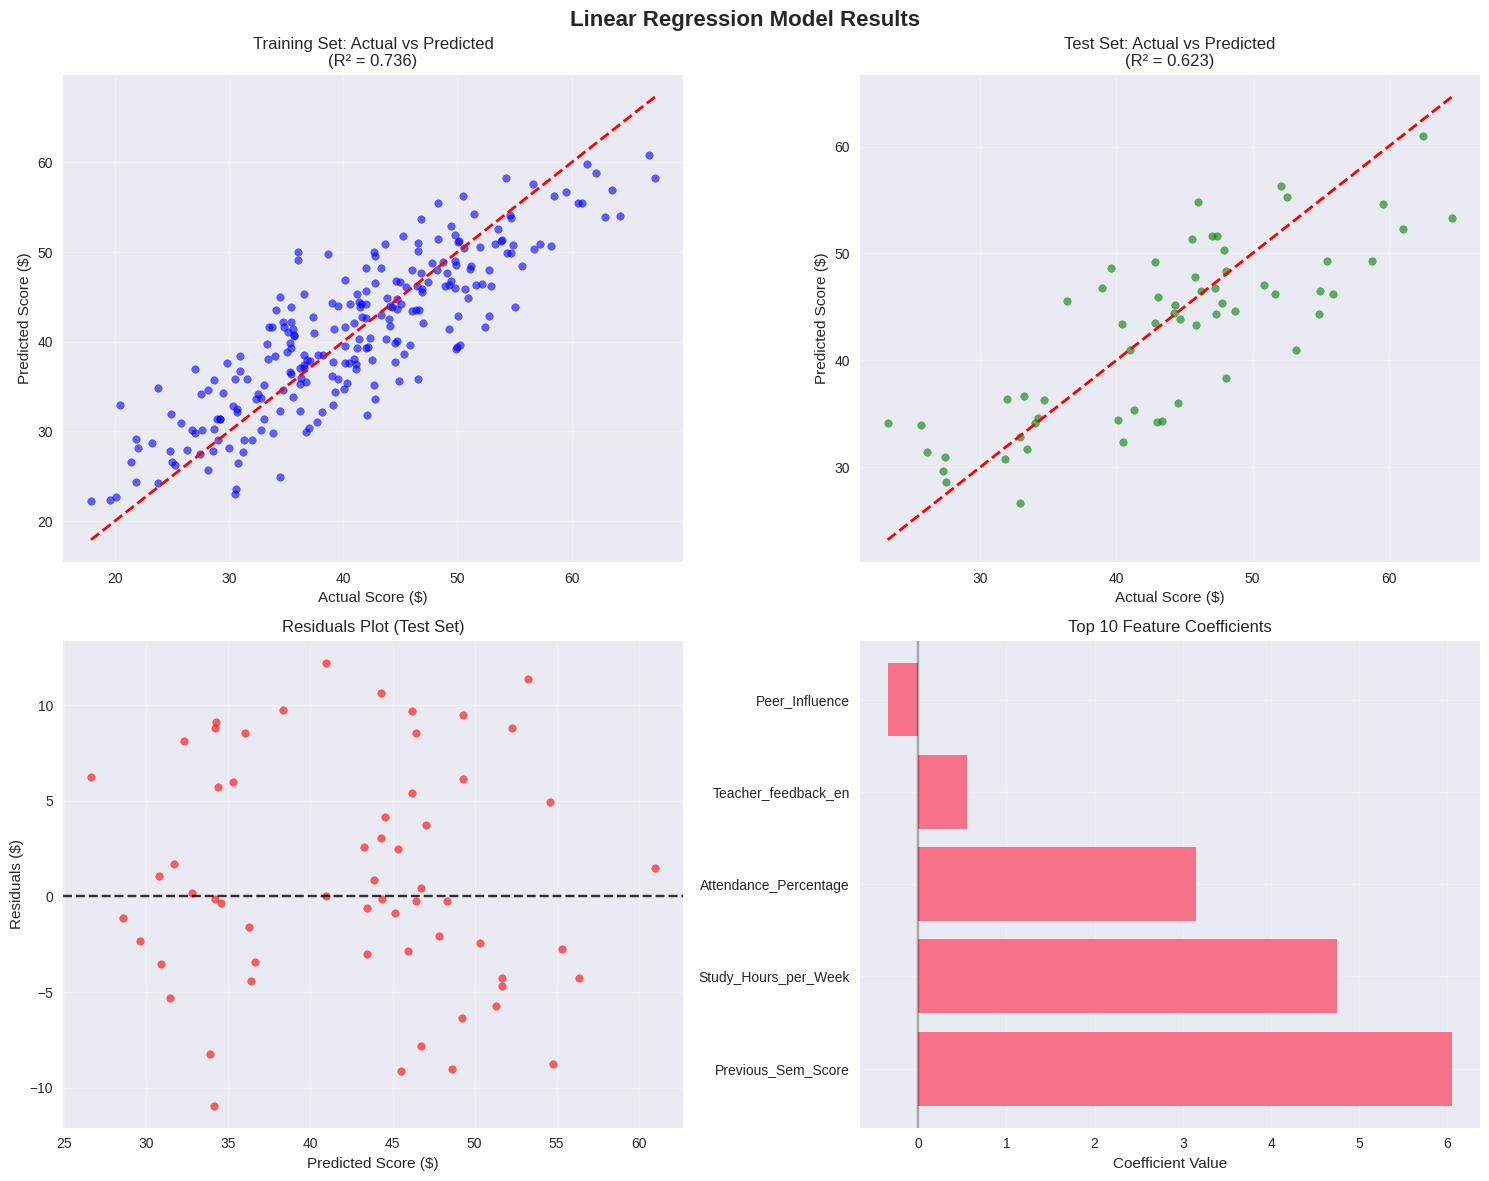

In [64]:
# Visualization of results
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Linear Regression Model Results', fontsize=16, fontweight='bold')

# Actual vs Predicted (Training)
axes[0, 0].scatter(y_train, y_pred_train, alpha=0.6, color='blue', s=30)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('Actual Score ($)')
axes[0, 0].set_ylabel('Predicted Score ($)')
axes[0, 0].set_title(f'Training Set: Actual vs Predicted\n(R² = {train_metrics["R2"]:.3f})')
axes[0, 0].grid(True, alpha=0.3)

# Actual vs Predicted (Testing)
axes[0, 1].scatter(y_test, y_pred_test, alpha=0.6, color='green', s=30)
axes[0, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0, 1].set_xlabel('Actual Score ($)')
axes[0, 1].set_ylabel('Predicted Score ($)')
axes[0, 1].set_title(f'Test Set: Actual vs Predicted\n(R² = {test_metrics["R2"]:.3f})')
axes[0, 1].grid(True, alpha=0.3)

# Residuals plot
residuals_test = y_test - y_pred_test
axes[1, 0].scatter(y_pred_test, residuals_test, alpha=0.6, color='red', s=30)
axes[1, 0].axhline(y=0, color='black', linestyle='--', alpha=0.8)
axes[1, 0].set_xlabel('Predicted Score ($)')
axes[1, 0].set_ylabel('Residuals ($)')
axes[1, 0].set_title('Residuals Plot (Test Set)')
axes[1, 0].grid(True, alpha=0.3)

# Feature importance
top_features_plot = feature_importance.head(10)
axes[1, 1].barh(range(len(top_features_plot)), top_features_plot['Coefficient'])
axes[1, 1].set_yticks(range(len(top_features_plot)))
axes[1, 1].set_yticklabels(top_features_plot['Feature'])
axes[1, 1].set_xlabel('Coefficient Value')
axes[1, 1].set_title('Top 10 Feature Coefficients')
axes[1, 1].axvline(x=0, color='black', linestyle='-', alpha=0.3)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [65]:
print("Model Summary")
print(f"Model Succesfully trained on {len(x_train)} samples")
print(f"Test R2 Score: {test_metrics["R2"]:.4f}")
print(f"Model can predict Final Score of Students with {test_metrics['R2']*100:.1f}% accuracy")
print(f"Most Important factor: {feature_importance.iloc[0]['Feature']}")


Model Summary
Model Succesfully trained on 240 samples
Test R2 Score: 0.6233
Model can predict Final Score of Students with 62.3% accuracy
Most Important factor: Previous_Sem_Score


In [66]:
import joblib
joblib.dump(model, 'Students_final_score.pkl')
joblib.dump(scaler,'scaler.pkl')
joblib.dump(selector,'feature_selector.pkl')
print("Model,Scaler and Selector saved successfully")

Model,Scaler and Selector saved successfully
